<a href="https://colab.research.google.com/github/DanielMartinAlarcon/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

## In-class example

In [4]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

### Make the figure look right

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install --upgrade seaborn
import seaborn as sns

fake = pd.Series([38,3,1,2,1,4,6,5,5,33], index=range(1,11))

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


Text(-2,46,'IMDB ratings for the film as of Aug. 29')

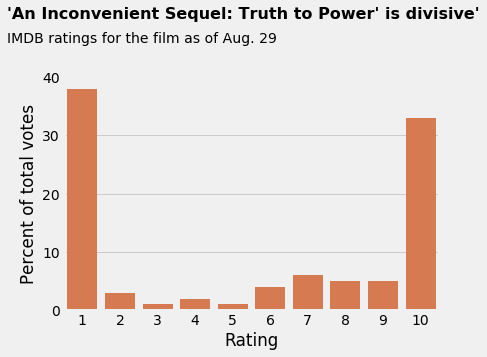

In [8]:
plt.style.use('fivethirtyeight');
ax = sns.barplot(x=fake.index, y=fake.values, color='#EC713B');

ax.set(xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10));

ax.tick_params(labelrotation=0);

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive'", 
        fontsize=16, fontweight='bold');

ax.text(x=-2, y=46, s='IMDB ratings for the film as of Aug. 29')

### Populate figure with the real data

In [0]:
pd.options.display.max_columns = 50
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Turn the timestamps from strings to actual time stamps
df.timestamp = pd.to_datetime(df.timestamp)

In [0]:
# set the timestamp to be the index.
df.set_index('timestamp', inplace=True)


In [12]:
columns = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
final = df[columns].tail(1)
final.columns = range(1,11)
final 

,1,2,3,4,5,6,7,8,9,10
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
colors = ['#333333']*10
colors[0] = '#EC713B'
colors[-1] = '#EC713B'

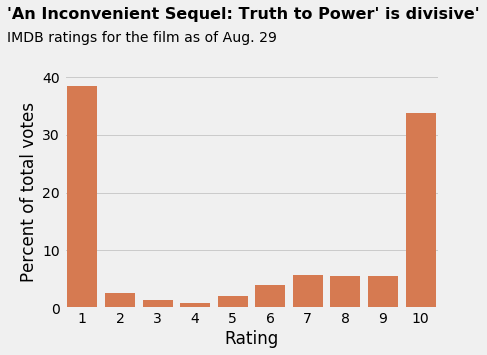

In [14]:
plt.style.use('fivethirtyeight');
ax = sns.barplot(x=final.columns, y=final.values[0], color='#EC713B');

ax.set(xlabel='Rating',
      ylabel='Percent of total votes',
      yticks=range(0,50,10));

ax.tick_params(labelrotation=0);

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive'", 
        fontsize=16, fontweight='bold');

ax.text(x=-2, y=46, s='IMDB ratings for the film as of Aug. 29');

## Next visualization

In [15]:
# First, let's look at the graph itself

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/methahickey-inconvenient-0830-6.png'
example = Image(url=url, width=600)

display(example)

I don't want to have to generate fake data that fits this pattern, so I'll work instead on extracting the real data first.

In [118]:
# I create new dataframe columns for the number of respondents in several rating ranges
df['1/10'] = df['respondents']*df['1_pct']*0.01
df['10/10'] = df['respondents']*df['10_pct']*0.01
df['2-9/10'] = df['respondents']-df['1/10']-df['10/10']

# I separate out the rows for Men and Women, and all users.

males = df[df.category == 'Males']
females = df[df.category == 'Females']
users = df[df.category == 'IMDb users']

# And combine men, women, and individual scores into a new dataframe
ratings = pd.DataFrame({'males':males.respondents, 
                        'females':females.respondents,
                        '1 out of 10 ratings':users['1/10'],
                        '10 out of 10 ratings':users['10/10'],
                        '2-9 out of 10 ratings':users['2-9/10']
                       })
                        
ratings.head(5) 

,1 out of 10 ratings,10 out of 10 ratings,2-9 out of 10 ratings,females,males
timestamp,,,,,
2017-07-17 12:28:32.785639,NaN,NaN,NaN,NaN,402.0
2017-07-17 12:28:33.025600,NaN,NaN,NaN,78.0,NaN
2017-07-17 12:28:36.697246,303.744,256.284,117.972,NaN,NaN
2017-07-17 12:34:17.770310,NaN,NaN,NaN,NaN,402.0
2017-07-17 12:34:17.963319,NaN,NaN,NaN,78.0,NaN


In [119]:
# Because each entry has a different timestamp, there's a NaN in every single row.
# I interpolate to fill the NaNs, and drop the first and last few rows because 
# interpolate doesn't fix them

ratings.interpolate(method='nearest', inplace=True)
ratings.dropna(inplace=True)
ratings.head()

,1 out of 10 ratings,10 out of 10 ratings,2-9 out of 10 ratings,females,males
timestamp,,,,,
2017-07-17 12:28:36.697246,303.744,256.284,117.972,78.0,402.0
2017-07-17 12:34:17.770310,303.744,256.284,117.972,78.0,402.0
2017-07-17 12:34:17.963319,303.744,256.284,117.972,78.0,402.0
2017-07-17 12:34:21.250099,303.744,256.284,117.972,78.0,402.0
2017-07-17 13:00:02.497484,303.744,256.284,117.972,78.0,402.0


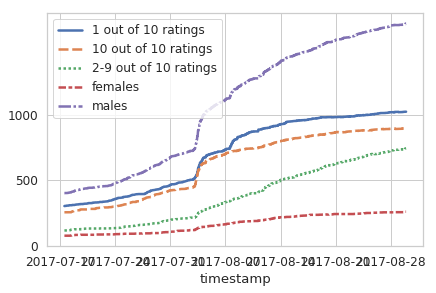

In [135]:
# And now I plot.

sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})

ax = sns.lineplot(data=ratings);
ax.set(yticks=range(0,1500,500));


In [0]:
'''
And those are the only parts that actually worked.  I notice that the way
I calculate the lines for ratings is wrong, clearly because 'IMDB users' is a 
category that contains more than just males and females (otherwise those lines
would be squished down further).  I ran out of time to fix that.

Most of my problems were with @#$%^& Seaborn itself, though, as most of the time 
trying to change some of the aesthetic parameters totally backfired for some 
reason.  I managed to change the line widths, but not the type of line or their 
color, and I didn't even try to change the timestamp labels on the axes.

'''